In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Check expression to RNA normalized data

In [3]:
raw = pd.read_csv('/nrnb/users/mpagadal/tcga-genotypes/germline-immune/immune.snp.raw',sep=' ')
raw.head()

,FID,IID,PAT,MAT,SEX,PHENOTYPE,1:1421752:G:A_A,1:7841330:G:A_A,1:7847836:C:T_T,1:7969014:G:A_A,...,19:55174498:T:C_C,19:55175740:C:T_T,19:55175983:T:A_A,19:55188593:G:C_C,19:55225076:C:A_A,20:8141433:G:T_T,20:50500689:T:A_A,20:50506724:G:C_C,20:59393575:C:T_T,21:46328099:C:T_T
0,TCGA-01-0628,TCGA-01-0628,0,0,2,-9,0,0,2,0,...,0,2,0,2,0,2,0,0,0,2
1,TCGA-01-0630,TCGA-01-0630,0,0,2,-9,1,0,2,0,...,0,0,0,1,0,1,0,0,1,1
2,TCGA-01-0633,TCGA-01-0633,0,0,2,-9,1,0,1,1,...,1,1,1,0,1,0,0,0,0,1
3,TCGA-01-0636,TCGA-01-0636,0,0,2,-9,1,0,0,2,...,0,1,0,0,2,2,0,0,1,0
4,TCGA-01-0637,TCGA-01-0637,0,0,2,-9,2,0,0,1,...,0,1,0,0,0,2,0,0,0,1


In [4]:
brian=pd.read_csv("../processed_phenos/brian-tpm/tumor/pheno_all_zcancer",delimiter="\t")
firebrowse=pd.read_csv("../processed_phenos/firebrowse/pheno_all_zcancer",delimiter="\t")
pancan=pd.read_csv("../processed_phenos/pancanatlas/pheno_all_zcancer",delimiter="\t")

In [5]:
canc = pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/birdseed-processing/gtype.meta", delimiter="\t", header=None)
mp = canc.set_index(2)[0].to_dict()

brian["cancer"]=brian["FID"].map(mp)
firebrowse["cancer"]=firebrowse["FID"].map(mp)
pancan["cancer"]=pancan["FID"].map(mp)

In [6]:
geno_immune=pd.merge(raw,brian,on=["FID","IID"])

In [11]:
[x for x in geno_immune.columns if "1:1421752:G:A" in x]

['1:1421752:G:A_A']

In [12]:
snp="1:1421752:G:A_A"
gene="Macrophage.Regulation"

In [13]:
geno_immune_gene=geno_immune[~(geno_immune[gene]==-9)]

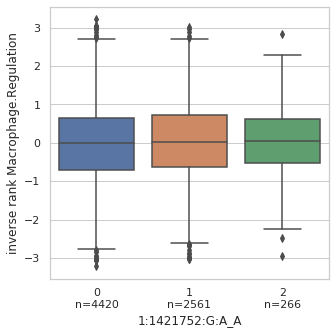

In [14]:
sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(5,5))
ax=sns.boxplot(x=snp,y=gene,data=geno_immune_gene)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels=[x+"\nn="+str(len(geno_immune_gene[geno_immune_gene[snp]==int(x)])) for x in labels]

ax.set_xticklabels(labels)
plt.ylabel("inverse rank "+gene)

plt.savefig(snp+"."+gene+".pdf")

## Get HUGO FPKM

In [ ]:
fpkm=pd.read_csv("/cellar/users/mpagadal/Data/resources/tcga/fpkm-compile/tcga-hugo-fpkm-compiled",delimiter="\t")

In [21]:
mp_fpkm=pd.read_csv("/cellar/users/mpagadal/Data/resources/from-labmembers/andrea/uuid_barcode_map.txt",delimiter="\t")

In [22]:
mp_fpkm["file_name"]=mp_fpkm["file_name"].str.split(".gz").str[0]

In [23]:
mp_fpkm=dict(zip(mp_fpkm["file_name"],mp_fpkm["sample_barcode"]))

In [24]:
cols=[]

for x in fpkm.columns:
    try:
        cols.append(mp_fpkm[x])
    except:
        cols.append(x)

In [25]:
fpkm.columns=cols

In [26]:
fpkm.head()

,ENSEMBL,TCGA-BG-A0MC-01A,HUGO,TCGA-E9-A1RC-11A,TCGA-DK-A1AC-01A,TCGA-BJ-A192-01A,TCGA-CV-5439-01A,TCGA-EL-A3N2-11A,TCGA-AX-A1CJ-01A,TCGA-DM-A280-01A,...,TCGA-A5-A0R9-01A,TCGA-IG-A3I8-01A,TCGA-SX-A71V-01A,TCGA-SX-A7SQ-01A,TCGA-05-4418-01A,TCGA-A2-A0YJ-01A,TCGA-CK-6748-01A,TCGA-CR-7365-01A,TCGA-H2-A421-01A,TCGA-43-3394-01A
0,ENSG00000242268.2,0.082829,RP11-368I23.2,1.001529,0.044982,0.000000,0.000000,0.000000,0.546947,0.000000,...,0.000000,0.016005,0.131952,0.676258,0.000000,0.000000,0.000000,0.000000,2.063867,0.000000
1,ENSG00000270112.3,0.000000,RP11-742D12.2,0.005053,0.000000,0.212113,0.000000,0.002555,0.000000,0.000000,...,0.000000,0.019986,0.000000,0.000000,0.000000,0.000000,0.003388,0.002720,0.010320,0.006392
2,ENSG00000167578.15,8.857925,RAB4B,1.799594,4.757692,3.900774,2.318098,1.574006,11.873389,2.995032,...,4.508456,2.814157,2.075035,2.595237,4.194652,1.874345,2.003841,1.279847,4.878818,2.251242
3,ENSG00000273842.1,0.000000,AC104183.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,1.128321,C12orf5,1.997276,5.578142,6.452027,7.492383,0.514639,1.525455,4.961469,...,1.936859,2.398235,5.913091,3.195661,10.157993,4.989331,3.045606,4.682713,3.144209,10.894560


In [27]:
keep_cols=[x for x in fpkm.columns if x[13:15]=="01"]

In [28]:
fpkm=fpkm.set_index("HUGO")
fpkm_tumor=fpkm[keep_cols]

In [29]:
fpkm_tumor=fpkm_tumor.T
fpkm_tumor.index=fpkm_tumor.index.str[0:12]

In [30]:
fpkm_tumor=fpkm_tumor.reset_index()

In [31]:
fpkm_tumor=fpkm_tumor.rename(columns={"index":"FID"})

In [32]:
fpkm_tumor=fpkm_tumor.groupby("FID").mean()

In [33]:
fpkm_tumor.head()

HUGO,RP11-368I23.2,RP11-742D12.2,RAB4B,AC104183.2,C12orf5,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,GABARAPL3,CYP4F2,RP11-486E2.1,AC010525.4,RP11-713D19.1,PPP6R1,RP4-569M23.2,AC009260.1,BATF3,OR8D4
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047,1.394336,0.120918,4.457040,0.0,5.608130,9.611185,0.0,0.003309,82.495270,0.096301,...,0.0,0.110278,0.018347,0.056121,0.232389,12.955587,0.574614,0.0,3.174645,0.0
TCGA-02-0055,0.000000,0.016449,3.816159,0.0,5.366732,5.208533,0.0,0.014066,208.344332,0.000000,...,0.0,0.006697,0.000000,0.238575,0.197580,10.583493,1.360946,0.0,5.258642,0.0
TCGA-02-2483,0.105521,0.014641,4.186546,0.0,6.592378,8.041341,0.0,0.002504,241.182395,0.145759,...,0.0,0.000000,0.000000,0.000000,0.087934,10.717918,0.072477,0.0,1.366954,0.0
TCGA-02-2485,0.747111,0.058052,7.431937,0.0,7.454003,9.499339,0.0,0.004255,155.047234,0.055040,...,0.0,0.020259,0.000000,0.000000,0.199229,14.397772,0.164207,0.0,2.666906,0.0
TCGA-02-2486,0.166204,0.000000,5.676945,0.0,9.009440,6.463168,0.0,0.015776,148.809904,0.061222,...,0.0,0.007511,0.000000,0.107034,0.055401,10.224824,0.756693,0.0,7.985885,0.0


In [34]:
fpkm_tumor+=1
fpkm_tumor=np.log2(fpkm_tumor)

In [35]:
geno_immune=pd.merge(raw,fpkm_tumor,on="FID",how="left")

In [39]:
snp=[x for x in geno_immune.columns if "6:58602122:A:G" in x][0]
gene="LINC00680"

Text(0, 0.5, 'log2 FPKM LINC00680')

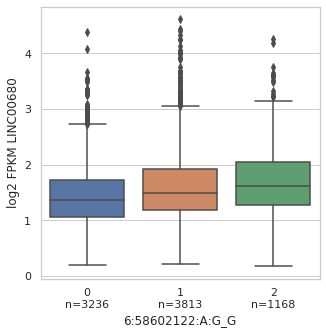

In [40]:
sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(5,5))
ax=sns.boxplot(x=snp,y=gene,data=geno_immune)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels=[x+"\nn="+str(len(geno_immune[geno_immune[snp]==int(x)])) for x in labels]

ax.set_xticklabels(labels)
plt.ylabel("log2 FPKM "+gene)


## Get gtex trans dataframe

In [46]:
snps=pd.read_csv("../snp-tables/immune-microenvironment-sig.tsv",delimiter="\t")
snps.head()

,snps,file,category,maf,variant,rsid,chr,brian beta,brian SE,brian P,...,ALT,firebrowse beta,firebrowse SE,firebrowse P,pancan beta,pancan SE,pancan P,consensus p,p-value,cis tss
0,19:7789796:T:C,CD209,cell type,0.25930,chr19:g.7789796T>C,rs10422720,19,-0.153826,0.018988,6.358100e-16,...,C,-0.174974,0.019221,1.126740e-19,-0.178179,0.018876,4.971470e-21,3,4.971470e-21,15084.0
1,19:7768298:A:G,CD209,cell type,0.15010,chr19:g.7768298A>G,rs58901714,19,-0.143563,0.023409,9.105090e-10,...,G,-0.157023,0.023889,5.293960e-11,-0.151253,0.023379,1.047650e-10,3,5.293960e-11,36582.0
2,3:159633885:T:C,CD209,cell type,0.01491,chr3:g.159633885T>C,rs76992466,3,-0.374997,0.068493,4.525630e-08,...,C,-0.340604,0.070042,1.182550e-06,-0.353152,0.068943,3.096210e-07,2,4.525630e-08,NaN
3,1:161508763:T:C,FCGR3B,cell type,0.36810,chr1:g.161508763T>C,rs10919544,1,0.166431,0.017210,5.489110e-22,...,C,0.237579,0.017299,2.300510e-42,0.236799,0.016959,9.737500e-44,3,9.737500e-44,84224.0
4,1:161572353:T:C,FCGR3B,cell type,0.14500,chr1:g.161572353T>C,rs67775399,1,-0.136145,0.023202,4.615400e-09,...,C,-0.166241,0.023540,1.799250e-12,-0.163998,0.023030,1.174700e-12,3,1.174700e-12,20634.0


In [47]:
snps[snps["snps"]=="6:58602122:A:G"]

,snps,file,category,maf,variant,rsid,chr,brian beta,brian SE,brian P,...,ALT,firebrowse beta,firebrowse SE,firebrowse P,pancan beta,pancan SE,pancan P,consensus p,p-value,cis tss
90,6:58602122:A:G,CD14,immunomodulators,0.3742,chr6:g.58602122A>G,rs2693076,6,-0.093316,0.017182,5.792990e-08,...,G,-0.091864,0.017469,1.495620e-07,-0.096153,0.017098,1.940020e-08,3,1.940020e-08,NaN
429,6:58602122:A:G,LILRB2,antigen present,0.3742,chr6:g.58602122A>G,rs2693076,6,-0.075616,0.017100,9.929310e-06,...,G,-0.086076,0.017492,8.815400e-07,-0.093224,0.017121,5.355250e-08,2,5.355250e-08,NaN
436,6:58602122:A:G,LAIR1,immunomodulators,0.3742,chr6:g.58602122A>G,rs2693076,6,-0.065084,0.017203,1.560190e-04,...,G,-0.091273,0.017470,1.796370e-07,-0.098363,0.017102,9.204820e-09,2,9.204820e-09,NaN
437,6:58602122:A:G,PLEK,immunomodulators,0.3742,chr6:g.58602122A>G,rs2693076,6,-0.080416,0.017210,3.029850e-06,...,G,-0.082619,0.017492,2.365900e-06,-0.093917,0.017121,4.264090e-08,1,4.264090e-08,NaN
475,6:58602122:A:G,MYO1F,immunomodulators,0.3742,chr6:g.58602122A>G,rs2693076,6,-0.055857,0.017233,1.195190e-03,...,G,-0.090779,0.017493,2.169950e-07,-0.099323,0.017122,6.876240e-09,2,6.876240e-09,NaN


In [48]:
geno_immune

,FID,IID,PAT,MAT,SEX,PHENOTYPE,1:1421752:G:A_A,1:7841330:G:A_A,1:7847836:C:T_T,1:7969014:G:A_A,...,GABARAPL3,CYP4F2,RP11-486E2.1,AC010525.4,RP11-713D19.1,PPP6R1,RP4-569M23.2,AC009260.1,BATF3,OR8D4
0,TCGA-01-0628,TCGA-01-0628,0,0,2,-9,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-01-0630,TCGA-01-0630,0,0,2,-9,1,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-01-0633,TCGA-01-0633,0,0,2,-9,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-01-0636,TCGA-01-0636,0,0,2,-9,1,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-01-0637,TCGA-01-0637,0,0,2,-9,2,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,TCGA-ZS-A9CE,TCGA-ZS-A9CE,0,0,2,-9,1,0,0,0,...,0.0,6.561367,0.0,0.136465,0.048562,2.957107,0.143788,0.0,0.104681,0.0
8213,TCGA-ZS-A9CF,TCGA-ZS-A9CF,0,0,1,-9,1,0,0,1,...,0.0,6.384363,0.0,0.000000,0.000000,2.565576,0.238709,0.0,0.269847,0.0
8214,TCGA-ZS-A9CG,TCGA-ZS-A9CG,0,0,1,-9,2,1,1,0,...,0.0,5.430264,0.0,0.000000,0.132384,2.785693,0.727973,0.0,0.221560,0.0
8215,TCGA-ZU-A8S4,TCGA-ZU-A8S4,0,0,1,-9,1,0,1,1,...,0.0,0.637937,0.0,0.074269,0.149748,4.058002,0.345335,0.0,1.381727,0.0


In [76]:
linc=linc[linc["assoc"].str.contains("5:49507235:G:A")]

In [49]:
genes=snps[snps["snps"]=="6:58602122:A:G"]["file"].tolist()

In [50]:
snp=["6:58602122:A:G_G"]

In [51]:
cols=[x for x in set(snp+genes+["LINC00680"])]

In [52]:
linc_geno_immune=geno_immune[cols]

In [54]:
mean=linc_geno_immune.groupby(snp).mean()

In [55]:
std=linc_geno_immune.groupby(snp).std()

In [56]:
std=std/3

In [57]:
mean

,LAIR1,LILRB2,CD14,MYO1F,PLEK,LINC00680
6:58602122:A:G_G,,,,,,
0,1.785180,1.308952,5.089867,1.722445,2.601566,1.436832
1,1.703170,1.245929,4.962315,1.654841,2.511153,1.589918
2,1.622372,1.183360,4.842778,1.581670,2.383163,1.689108


LAIR1
LILRB2
CD14
MYO1F
PLEK


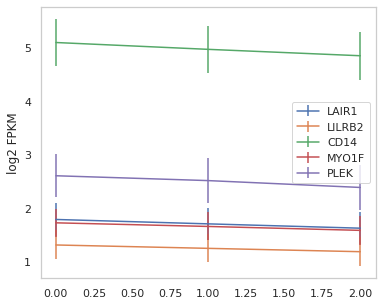

In [58]:
plt.figure(figsize=(6,5))
for i in mean.columns:
    if i!= "LINC00680":
        print(i)
        plt.errorbar([0,1,2], mean[i].tolist(), yerr=std[i].tolist(),label=i) 
plt.legend()
plt.grid(b=None)
plt.ylabel("log2 FPKM")
plt.savefig("../plots/LINC00680.mac.pdf", bbox_inches='tight')

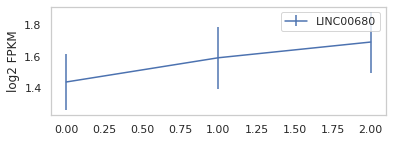

In [59]:
plt.figure(figsize=(6,2))
plt.errorbar([0,1,2], mean["LINC00680"].tolist(), yerr=std["LINC00680"].tolist(),label="LINC00680") 
plt.legend()
plt.ylabel("log2 FPKM")
plt.grid(b=None)
plt.savefig("../plots/LINC00680.pdf", bbox_inches='tight')